# **Executive Summary**


In [17]:
# Edit to mount Google Drive if you wish
# Otherwise, upload file(s)
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ColabNotebooks/PDA/DataAnalysis
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyDrive/ColabNotebooks/PDA/DataAnalysis'
/content
/content


Through the entirety of this project, we  learned about, came to understand, and created a machine learning model for a dataset regarding League of Legends. We cleaned data, visualized the data for a better grasp, prepared the data to properly be used for our model, and finally we made the model itself. In the end, we had ourselves a Logistic Regression Model that stood with a prediction success rate of about 74%. Through this process we came to understand that from our data: First Blood, Blue Kills, Blue Deaths, Blue Gold Difference, Blue Creep Score Per Minute, and Blue Elite Monster Kills prevailed as the best features for our model to predict on.

# **Introduction**

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns 
from sklearn.model_selection import train_test_split

The data we used for our project was appropriately labeled "high_diamond_ranked_10min" and is a dataset consisting of various points of data from the first 10 minutes of high rank diamond matches in league of legends.

Using our data we started preparing and modeling with one main question in mind what could be gathered from our dataset. Which features hold the most weight in determining the winning team in one of these League matches?

In [7]:
#Data Dictionary for our Dataset
DataDict = pd.read_csv("LoLDataDictionary.csv")
pd.read_csv("LoLDataDictionary.csv")

,Name,Modeling data type,Full description of the feature,Unit of measurement,I=input T=target
0,blueWins,qualitative - binary,Tracks which team one based on whether the blu...,0 = False / 1 = True,T
1,blueWardsPlaced,quantitative - discrete,Tracks the amount of Wards placed by the blue...,Total/10 Minutes,I
2,blueWardsDestroyed,quantitative - discrete,Tracks the amount of wards destroyed by the bl...,Total/10 Minutes,I
3,blueFirstBlood,qualitative - binary,Tracks whether or not the blue team had the fi...,0 = False / 1 = True,I
4,blueKills,quantitative - discrete,Tracks how many kills the blue team had,Total/10 min,I
5,blueDeaths,quantitative - discrete,Tracks how many deaths the blue team had,Total/10 min,I
6,blueAssists,quantitative - discrete,Tracks how many assists the blue team shared,Total/10 min,I
7,blueEliteMonsters,quantitative - discrete,Tracks how many elite monsters the blue team k...,Total/10 min,I
8,blueDragons,quantitative - discrete,Tracks how many dragons the blue team killed,Total/10 min,I
9,blueHeralds,quantitative - discrete,Tracks how many heralds the blue team killed,Total/10 min,I


# **Data Exploration and Visualization**

In [8]:
originalData = pd.read_csv("high_diamond_ranked_10min.csv")
originalData.rename(columns = {'gameId' : 'Game ID', 'blueWins' : 'Blue Wins', 'blueWardsPlaced' : 'Blue Wards Placed', 'blueWardsDestroyed' : 'Blue Wards Destroyed', 
                       'blueFirstBlood' : 'Blue First Blood', 'blueKills' : 'Blue Kills', 'blueDeaths' : 'Blue Deaths', 'blueAssists' : 'Blue Assists', 'blueEliteMonsters' : 'Blue Elite Monsters', 'blueDragons' : 'Blue Dragons', 'blueHeralds' : 'Blue Heralds',
                       'blueTowersDestroyed' : 'Blue Towers Destroyed', 'blueTotalGold' : 'Blue Total Gold', 'blueAvgLevel' : 'Blue Average Level', 'blueTotalExperience' : 'Blue Total Experience', 'blueTotalMinionsKilled' : 'Blue Total Minions Killed', 'blueTotalJungleMinionsKilled' : 'Blue Total Jungle Minions Killed', 'blueGoldDiff' : 'Blue Gold Difference',
                       'blueExperienceDiff' : 'Blue Experience Difference', 'blueCSPerMin' : 'Blue Creep Score Per Min', 'blueGoldPerMin' : 'Blue Gold Per Min',
                       'redWins' : 'Red Wins', 'redWardsPlaced' : 'Red Wards Placed', 'redWardsDestroyed' : 'Red Wards Destroyed', 
                       'redFirstBlood' : 'Red First Blood', 'redKills' : 'Red Kills', 'redDeaths' : 'Red Deaths', 'redAssists' : 'Red Assists', 'redEliteMonsters' : 'Red Elite Monsters', 'redDragons' : 'Red Dragons', 'redHeralds' : 'Red Heralds',
                       'redTowersDestroyed' : 'Red Towers Destroyed', 'redTotalGold' : 'Red Total Gold', 'redAvgLevel' : 'Red Average Level', 'redTotalExperience' : 'Red Total Experience', 'redTotalMinionsKilled' : 'Red Total Minions Killed', 'redTotalJungleMinionsKilled' : 'Red Total Jungle Minions Killed', 'redGoldDiff' : 'Red Gold Difference',
                       'redExperienceDiff' : 'Red Experience Difference', 'redCSPerMin' : 'Red Creep Score Per Min', 'redGoldPerMin' : 'Red Gold Per Min'}, inplace=True)



One beginning important detail for our dataset is understanding that many of the features included come out as copies of eachother, as show below that as blue kills increase, then red deaths increases 1:1. This is an obvious connection, but it contributes to the narrowing down of features later on, allowing us to scrap a decent chunk of the data that wasn't necessary.

Many of the variables affected eachother. For example, if a player kills another player (blueKills or redKills), that player gains gold (blueGoldDiff, blueTotalGold) and experience (blueTotalExperience, blueExperienceDiff). We ultimately separated them to find the best columns.

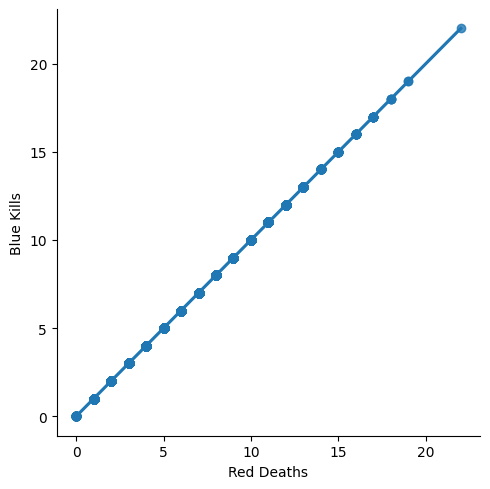

In [9]:
sns.lmplot(y="Blue Kills", x="Red Deaths", data=originalData, fit_reg=True)

# **Data Preparation**

In [10]:
from sklearn.preprocessing import MinMaxScaler
features_to_scale = ['Blue First Blood', 'Blue Kills', 'Blue Deaths', 'Blue Experience Difference', 'Blue Gold Difference', 'Blue Creep Score Per Min', 'Blue Elite Monsters']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(originalData[features_to_scale])
data_scaled = originalData.copy()
data_scaled[features_to_scale] = scaled_data

# **Data Modeling**

For our model we decided to run with a Logistic Regression Model, this was mainly due to the nature of our data fit LogReg the best, followed by classification. Using Logistic Regression and our dataset we made a model that predicts correct outcomes with a success rate of about 74%.

In [11]:
# setting the features for the model and the target for the model
feature_set = ['Blue Kills', 'Blue Deaths','Blue First Blood','Blue Gold Difference','Blue Experience Difference','Blue Creep Score Per Min','Blue Elite Monsters']
features = data_scaled[feature_set]
target = data_scaled['Blue Wins']
#splitting the dataset into a 70:30 
feature_train, feature_test, target_train, target_test = \
train_test_split(features, target, test_size=0.3, random_state=1)
from sklearn.linear_model import LogisticRegression # for the model
from sklearn.metrics import accuracy_score  # for performance evaluation
from sklearn.metrics import confusion_matrix  # for confusion matrix

#building the model
league_LogReg = LogisticRegression(solver = 'lbfgs',max_iter = 100)
league_LogReg.fit(feature_train, target_train)
predictions = league_LogReg.predict(feature_test)





# **Modeling Assumptions Satisfied**

1.   **Multicollinearity:** We ran a correlation matrix and found a high correlation for several columns. This was an assumption we had from the beginning based on our understanding of League of Legends. For example, Minion kills increases your Creep Score. So, our columns Creep Score Per Minute and Total Minion Kills we clearly correlated from the beginning.
2.   **No missing data:** We checked for missing data before modeling. We were fortunate in our dataset to have no missing values.
3. **Outliers:** Our dataset was filled with outliers. However, not even the extreme outliers in our dataset were removed because all of them are considered within the realm of possibility for a League of Legends match.
4. **Independence:** None of the matches were influenced by other matches.
5. **Size of dataset:** Logistic regression works better with large datasets. Because our dataset was so large (9,878 rows), it worked well for modeling.

<Axes: >

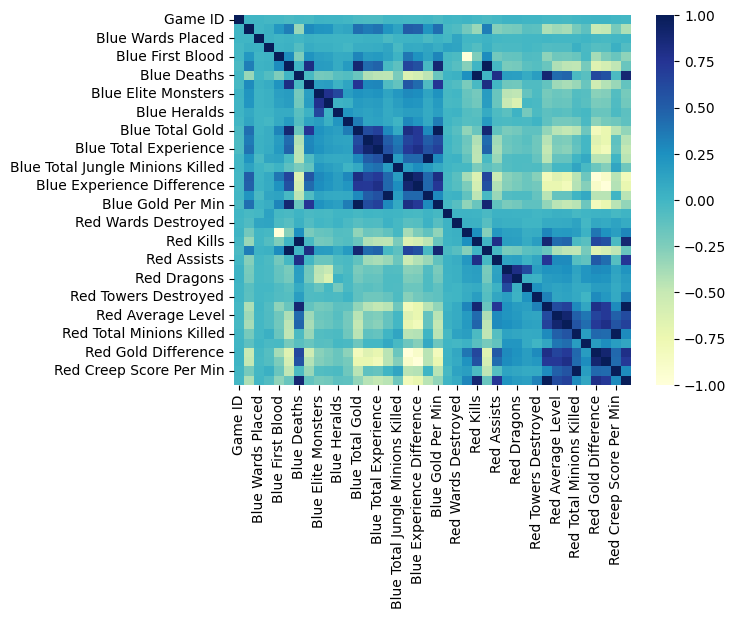

In [12]:
corr = data_scaled.corr()
sns.heatmap(corr, annot=False, cmap='YlGnBu')

In [13]:
originalData.isna().sum()

Game ID                             0
Blue Wins                           0
Blue Wards Placed                   0
Blue Wards Destroyed                0
Blue First Blood                    0
Blue Kills                          0
Blue Deaths                         0
Blue Assists                        0
Blue Elite Monsters                 0
Blue Dragons                        0
Blue Heralds                        0
Blue Towers Destroyed               0
Blue Total Gold                     0
Blue Average Level                  0
Blue Total Experience               0
Blue Total Minions Killed           0
Blue Total Jungle Minions Killed    0
Blue Gold Difference                0
Blue Experience Difference          0
Blue Creep Score Per Min            0
Blue Gold Per Min                   0
Red Wards Placed                    0
Red Wards Destroyed                 0
Red First Blood                     0
Red Kills                           0
Red Deaths                          0
Red Assists 

# **Visualization and Interpretation of the Model**

Using a confusion matrix, our logistic regression model has an accuracy of 74% with First Blood, Blue Kills, Blue Deaths, Blue Gold Difference, Blue Creep Score Per Minute, and Blue Elite Monster Kills

Logistic Regression Model Accuracy: 0.7415654520917678

True Positives  | False Positives

----------------|----------------

False Negatives | True Negatives 



<Axes: >

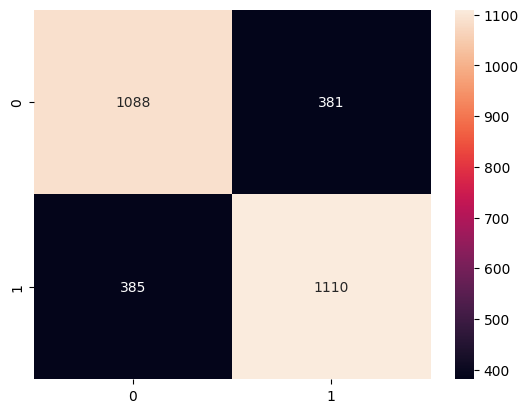

In [14]:
print(f'Logistic Regression Model Accuracy: ' \
      f'{accuracy_score(target_test, predictions)}\n')

# a confusion matrix with a key above

print(f'True Positives  | False Positives\n')
print(f'----------------|----------------\n')
print(f'False Negatives | True Negatives \n')
cm = confusion_matrix(target_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')

# **Evaluation of Model Strength**

Out of all columns in our dataset, First Blood, Blue Kills, Blue Deaths, Blue Gold Difference, Blue Creep Score Per Minute, and Blue Elite Monster Kills are the most influential factors of winning a game in League of Legends.

In [15]:
print(f'Logistic Regression Model Accuracy: ' \
      f'{accuracy_score(target_test, predictions)}\n')

Logistic Regression Model Accuracy: 0.7415654520917678



## **Contributions**

## **Dylan Kirk** : completed the layout, Structure, and format of the project. As well as adding explanations to the content.

## **Billy Fultz**: Looked over final edit and added information where needed.

## **Thomas Westerfield**: Made the video presentation.